# Exploratory Data Analysis

The project aims at building models that can efficietly predict if a person is affected with CAD (a major heart disease) or not.
Coronary artery disease is caused by plaque buildup in the wall of the arteries that supply blood to the heart (called coronary arteries).The approach is to perform exploratory data analysis on the dataset so that the major insights can be captured and further use the data to build supervised machine learning models.

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv("C:/Users/91866/OneDrive/Desktop/ML LAB/Disease prediction ML project/heart disease dataset.csv")  #reading the data

In [3]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
df.info()                                  #listing out the information related to the columns of the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [5]:
df.isnull().sum()                       #checking for total null values

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

The columns were found to not have any missing or NaN values.

In [6]:
df.shape                    

(1190, 12)

In [7]:
df.rename(columns={'target':'Affected'},inplace=True)                            #renaming the response variable column  
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,Affected
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


The response variable column "target" which consists of binary values indicating if the person is affected or not was renamed to "Affected" so that the visualizations would be more understandable.

In [8]:
df['sex'].replace(0, 'Female',inplace=True)                            #replacing the binary values of the sex column as male and female
df['sex'].replace(1, 'Male',inplace=True)
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,Affected
0,40,Male,2,140,289,0,0,172,0,0.0,1,0
1,49,Female,3,160,180,0,0,156,0,1.0,2,1
2,37,Male,2,130,283,0,1,98,0,0.0,1,0
3,48,Female,4,138,214,0,0,108,1,1.5,2,1
4,54,Male,3,150,195,0,0,122,0,0.0,1,0


In [9]:
df['sex'].value_counts()                                               

Male      909
Female    281
Name: sex, dtype: int64

The number of males is seen to higher in the dataset than females.

In [10]:
df.groupby(['sex','Affected'])['Affected'].count()                      #grouping the total number of affected and healthy patients based on their gender

sex     Affected
Female  0           211
        1            70
Male    0           350
        1           559
Name: Affected, dtype: int64

In [11]:
df.describe().T                                                        #descriptive statistics og the varibales

,count,mean,std,min,25%,50%,75%,max
age,1190.0,53.720168,9.358203,28.0,47.0,54.0,60.00,77.0
chest pain type,1190.0,3.232773,0.935480,1.0,3.0,4.0,4.00,4.0
resting bp s,1190.0,132.153782,18.368823,0.0,120.0,130.0,140.00,200.0
cholesterol,1190.0,210.363866,101.420489,0.0,188.0,229.0,269.75,603.0
fasting blood sugar,1190.0,0.213445,0.409912,0.0,0.0,0.0,0.00,1.0
resting ecg,1190.0,0.698319,0.870359,0.0,0.0,0.0,2.00,2.0
max heart rate,1190.0,139.732773,25.517636,60.0,121.0,140.5,160.00,202.0
exercise angina,1190.0,0.387395,0.487360,0.0,0.0,0.0,1.00,1.0
oldpeak,1190.0,0.922773,1.086337,-2.6,0.0,0.6,1.60,6.2
ST slope,1190.0,1.624370,0.610459,0.0,1.0,2.0,2.00,3.0


The "cholestrol" column which indicates the serum cholestrol level and the "resting bp s" which indicates the resting blood pressure levels are seen to have a minimum value of zero which is not an ideal scenario.So the zeroes are being replaced with the mean of the respective column values.

In [12]:
df['cholesterol']=df['cholesterol'].replace(0,int(df['cholesterol'].mean()))                        #replacing the zeroes with mean

In [13]:
df['resting bp s']=df['resting bp s'].replace(0,int(df['resting bp s'].mean()))                   #replacing the zeroes with mean


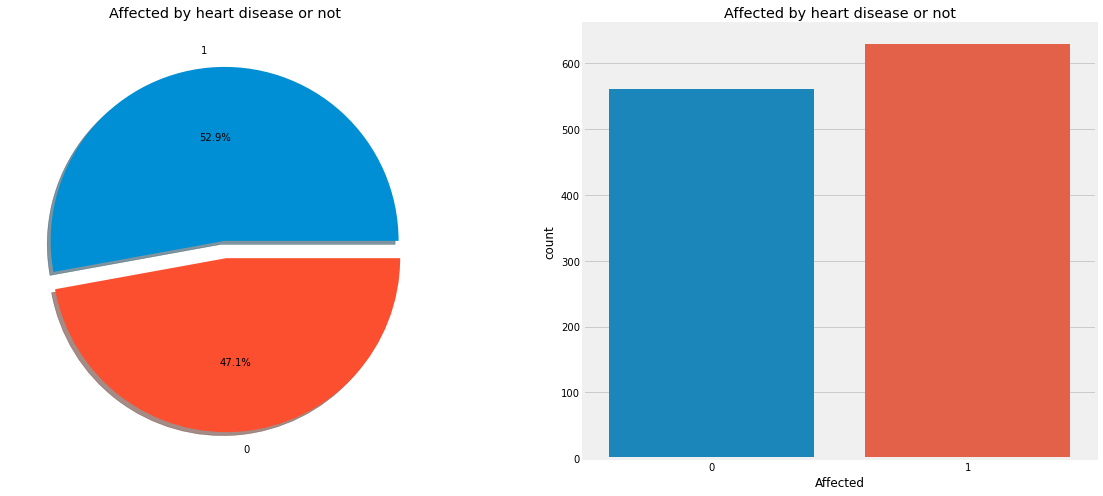

In [14]:
#plotting a pie chart and a bar plot indicating the proportion of affected and healthy patients
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Affected'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)          
ax[0].set_title('Affected by heart disease or not')
ax[0].set_ylabel('')
sns.countplot('Affected',data=df,ax=ax[1])
ax[1].set_title('Affected by heart disease or not')
plt.show()


It is clearly evident that though there is not much significant difference, most of the patients are affected by the heart disease. Out of 1190 patients 52.9% of them are affected by the disease.

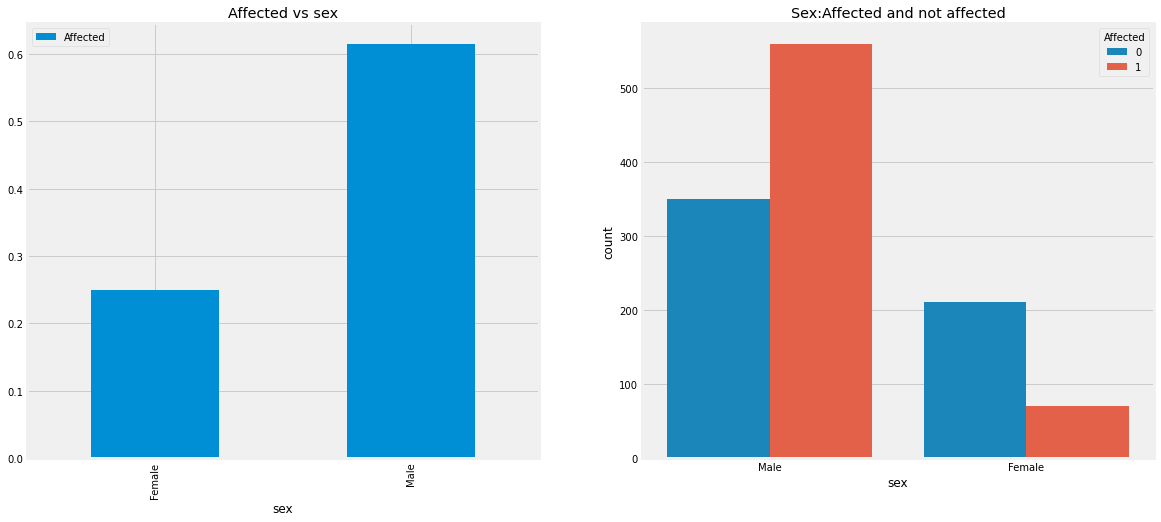

In [15]:
#barplots of affected against their gender  
f,ax=plt.subplots(1,2,figsize=(18,8))
df[['sex','Affected']].groupby(['sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Affected vs sex')
sns.countplot('sex',hue='Affected',data=df,ax=ax[1])
ax[1].set_title('Sex:Affected and not affected')
plt.show()

More number of men are seen to affected by the disease considering the total number of patients. Among women in the dataset most of them are not seen to be affected by the disease

In [16]:
df['chest pain type'].value_counts()

4    625
3    283
2    216
1     66
Name: chest pain type, dtype: int64

4    625
3    283
2    216
1     66
Name: chest pain type, dtype: int64

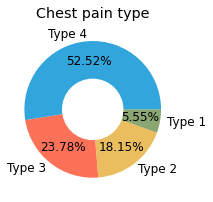

In [17]:
#pieplot indicating the major chest pain types
labels=['Type 4', 'Type 3', 'Type 2', 'Type 1']
plt.subplot(1, 2, 1)
plt.title('Chest pain type')
plt.pie(df['chest pain type'].value_counts(), labels=labels,pctdistance=0.7, 
        autopct='%.2f%%', textprops={'fontsize':12},
        wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white',)
plt.gcf().gca().add_artist(centre)
df['chest pain type'].value_counts()

Chest pain type 4 (asymptomatic) is seen to be the highest followed by type 3, type 2 and the least is type 1. 

0    936
1    254
Name: fasting blood sugar, dtype: int64

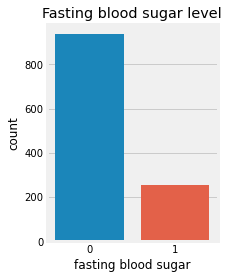

In [18]:
#plotting bars indicating the number of patients with fasting blood sugar level greater than or less than 120 mg/dl
countplt = plt.subplot(1, 2, 2)
plt.title('Fasting blood sugar level')
ax = sns.countplot(x='fasting blood sugar', data=df)
df['fasting blood sugar'].value_counts()

The number of patients with fasting blood sugar level <120 mg/dl (indicated by 0) are higher in number.

0    684
2    325
1    181
Name: resting ecg, dtype: int64

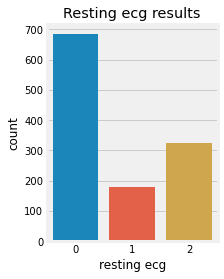

In [19]:
#barplots indicating the resting ecg level types and counts
countplt = plt.subplot(1, 2, 2)
plt.title('Resting ecg results')
ax = sns.countplot(x='resting ecg', data=df)
df['resting ecg'].value_counts()

Most of the patients have a normal ecg result, but still many of them affected by the disease, this explains why sometimes screening tools such as ecg may not always be able to detect diseases at an early stage, beacause the patients can be asymptomatic.

array([<AxesSubplot:title={'center':'ST slope'}>], dtype=object)

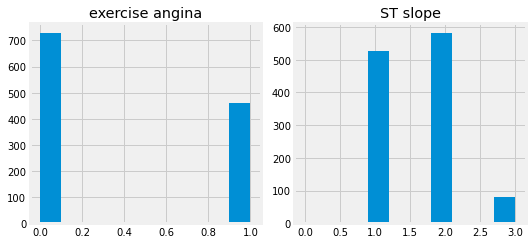

In [20]:
#plotting the proportion of pateints with and without exercise induced angina
#plotting the count of patients showing different ST slope values. 
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fig, axes = plt.subplots(1, 2)
df.hist('exercise angina',ax=axes[0])
df.hist('ST slope',ax=axes[1])


Pateints without exercise induced angina are higher.Slope 1 and 2 almost have a similar distribution, though slope 2 is predominant.

Mean Age : 53


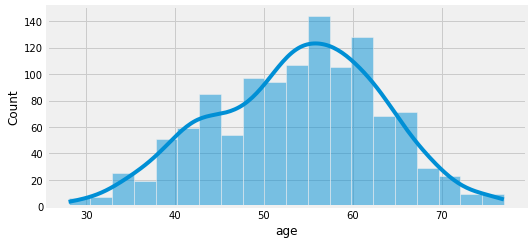

In [21]:
#histogram representing the distribution of age of the patients. 
sns.histplot(data=df, x="age", kde=True)
print('Mean Age :',int(df.age.mean()))

Distribution of age shows that, most of the patients are middle aged with a mean age around 53 years

<AxesSubplot:xlabel='chest pain type', ylabel='age'>

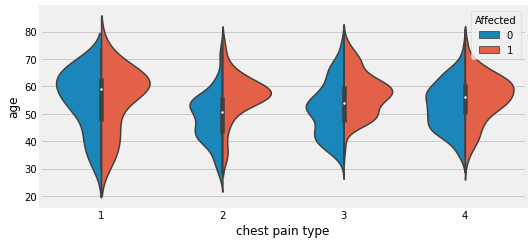

In [22]:
#violinplot representing the various chest pain types vs age grouped by (affected or healthy) 
sns.violinplot(x='chest pain type', y='age', hue='Affected', data=df,  
               linewidth=1.5, 
               split=True)

Younger patients are seen to have chest pain type 1 and 2, also patients who have heart diseases are younger than those not affected.

Text(0.5, 0.98, 'Pairplot')

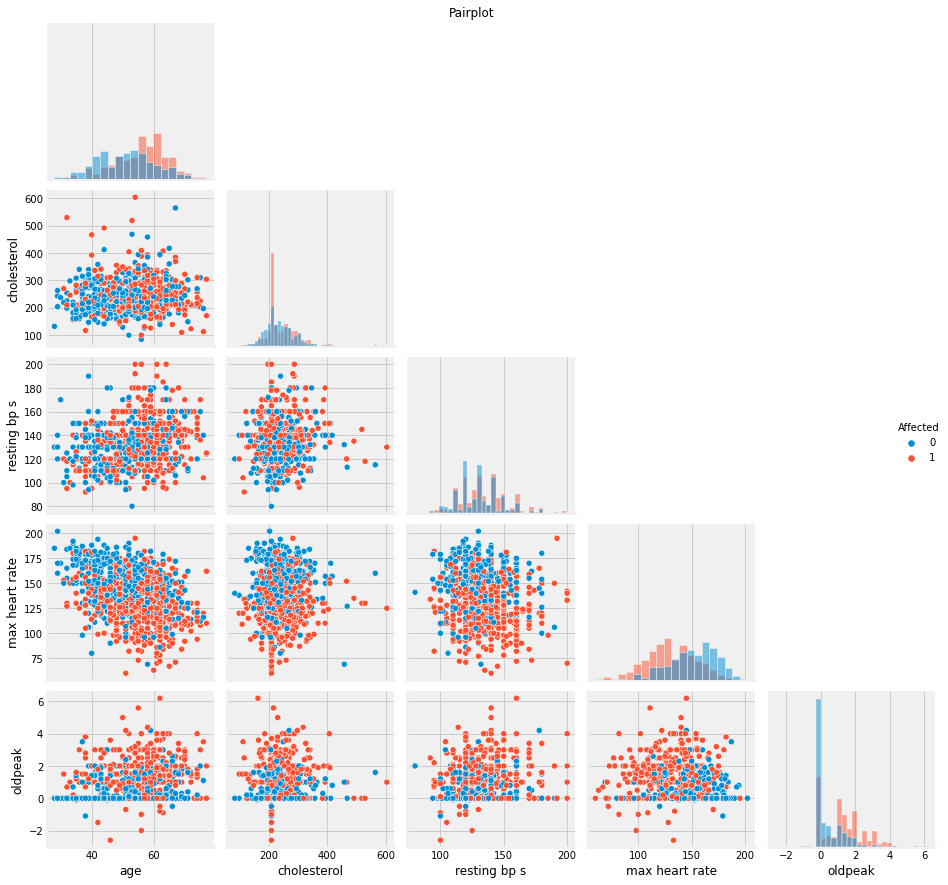

In [23]:
#pairplot of variables with numerical values
numerical_var=['age', 'cholesterol', 'resting bp s', 'max heart rate', 'oldpeak', 'Affected']
g = sns.pairplot(df[numerical_var], hue="Affected", corner=True, diag_kind='hist')
plt.suptitle('Pairplot')

(11.5, -0.5)

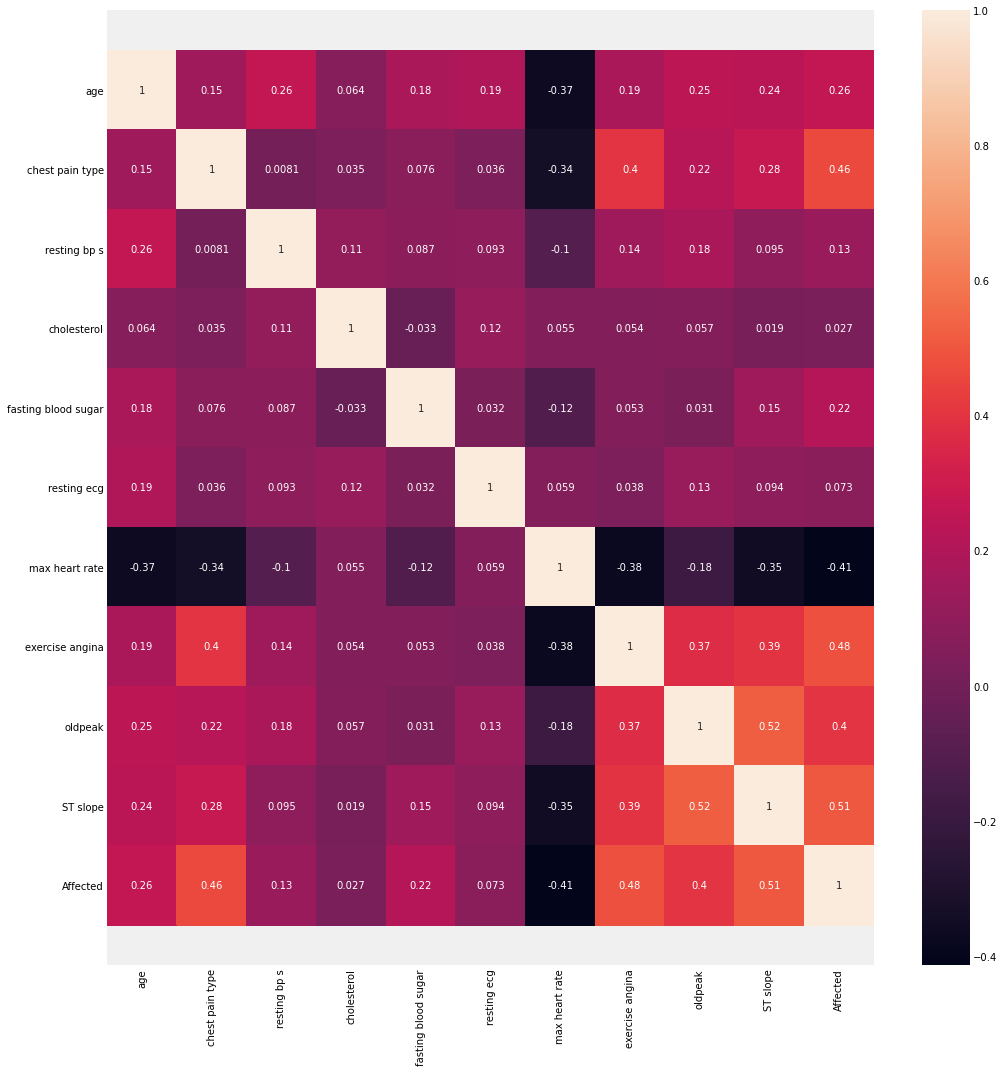

In [24]:
#plotting a heatmap of the correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,annot=True,)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Very high positive correlation among the variables is not seen, but certain variables are negatively correlated.

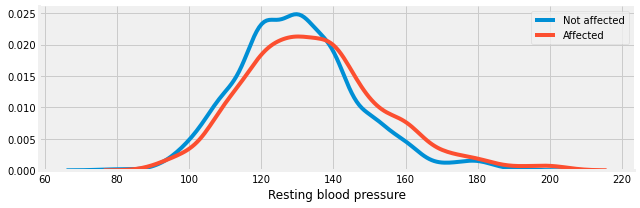

In [25]:
#plot of the distribution of resting blood pressure
fig = sns.FacetGrid(df, hue="Affected",aspect=3)
fig.map(sns.kdeplot,'resting bp s')
plt.legend(labels=['Not affected' , 'Affected'])
fig.set(xlabel = 'Resting blood pressure')

Patients who are affected by the heart disease seem to have a slightly lower resting blood pressure

[Text(0.5, 0, 'Serum cholestrol')]

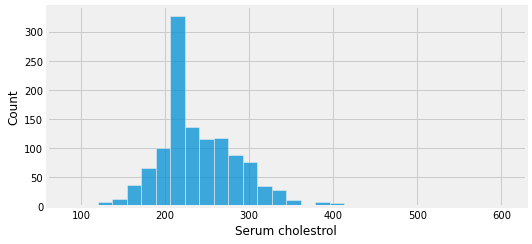

In [26]:
#histogram of the distribution of serum cholestrol 
fig = sns.histplot(df['cholesterol'], bins= 30)
fig.set(xlabel = 'Serum cholestrol')

Majority of the patients have a cholestrol level around 200 mg/dl

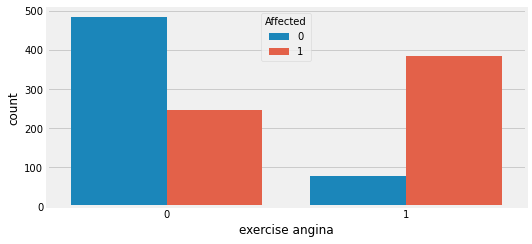

In [27]:
#barplot indicating the count of exercise induced angina among affected and healthy patients
fig = sns.countplot(x = 'exercise angina', data = df, hue = 'Affected')


Most of the healthy people are not seen to experience exercise induced angina, where as most of the people who experience angina are affected by the heart disease

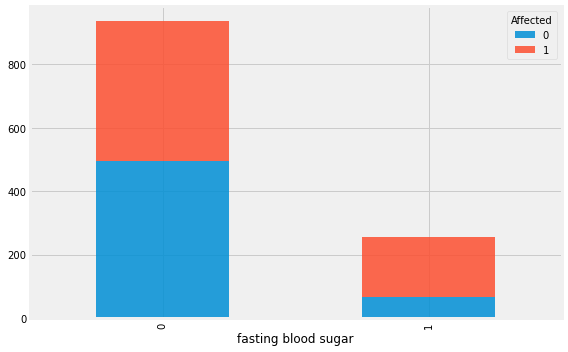

In [28]:
#stacked barplot of fasting blood sugar stacked according to healthy and sick patients
ax = pd.crosstab(df['fasting blood sugar'], df['Affected']).plot(kind='bar', figsize=(8, 5), 
                                         stacked=True,
                                         alpha=0.85)

The number of patients with low sugar level is higher compared to patients with high fasting blood sugar level. 